In [112]:
# Analisis de Cluster con Precio y Frecuencia

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.text as mtext


# Carga tu dataframe aquí
df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')

print(df.head())


   price    year manufacturer                  model fuel  odometer  \
0  22590  2010.0    chevrolet         silverado 1500  gas   71229.0   
1  30990  2017.0       toyota   tundra double cab sr  gas   41124.0   
2  15000  2013.0         ford               f150 xlt  gas  128000.0   
3  35000  2019.0       toyota                 tacoma  gas   43000.0   
4  29990  2016.0    chevrolet  colorado extended cab  gas   17302.0   

  transmission drive       size    type state      lat       long  
0        other   4wd  full-size  pickup    al  32.5900 -85.480000  
1        other   4wd  full-size  pickup    al  32.5900 -85.480000  
2    automatic   rwd  full-size   truck    al  32.5920 -85.518900  
3    automatic   4wd   mid-size   truck    al  32.6013 -85.443974  
4        other   4wd   mid-size  pickup    al  32.5900 -85.480000  


In [113]:
# Agrupamos por 'manufacturer' y calculamos el precio promedio y la frecuencia
manufacturer_stats = df.groupby('manufacturer')[['price']].agg({'price': ['mean', 'count']})

# Renombramos las columnas
manufacturer_stats.columns = ['price_avg', 'frequency']

# Ordenamos por frecuencia descendente
manufacturer_stats = manufacturer_stats.sort_values(by='frequency', ascending=False)



In [114]:
# Definimos el número de clusters
n_clusters = 10  # Puedes ajustar este valor según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Ajustamos el modelo a los datos de precio promedio
kmeans.fit(manufacturer_stats[['price_avg']])

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

print(manufacturer_stats.head)



<bound method NDFrame.head of                     price_avg  frequency  cluster
manufacturer                                     
ford             18500.960695      45210        5
chevrolet        17784.172745      34629        2
toyota           16130.654393      23709        2
honda            10875.695003      15951        4
nissan           11986.507561      13953        4
jeep             19430.735923      13000        5
ram              27488.276019       9224        7
gmc              20037.287927       8714        5
dodge            13991.429372       8566        9
bmw              15981.840444       7383        2
hyundai          10854.207127       7184        4
subaru           12556.004093       6841        4
mercedes-benz    17476.992362       5499        2
volkswagen       11479.315340       5391        4
kia              10949.761692       5367        4
lexus            16557.447673       4577        2
chrysler         10012.923077       4498        8
cadillac         162

C:\Users\sergi\AppData\Local\Temp\ipykernel_18920\3039400343.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['price_avg'], cluster_data['frequency'], c=cluster_colors[i], label=f'Cluster {cluster+1}')


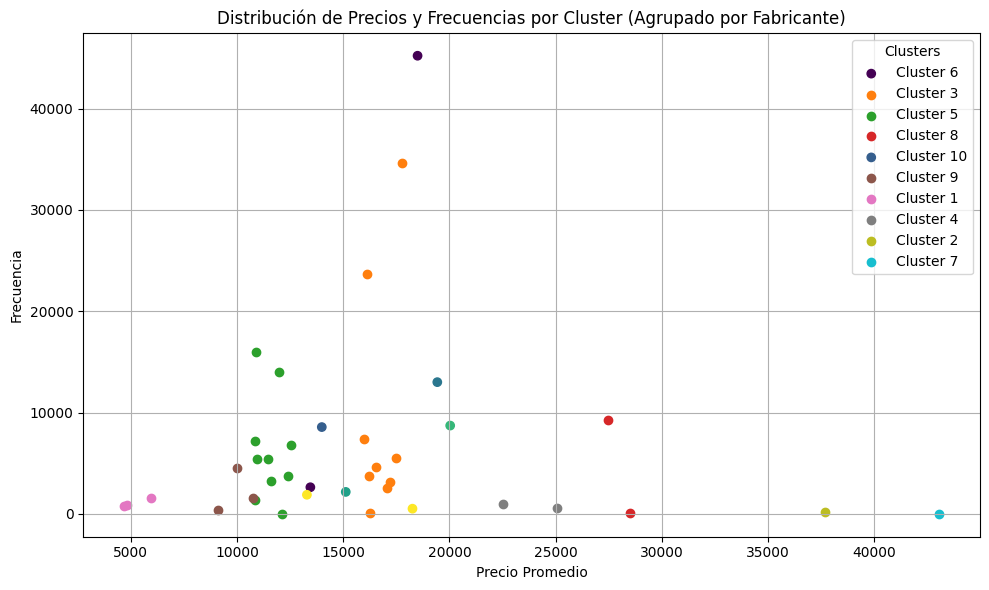

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# ... (Carga del DataFrame y creación de manufacturer_stats como en el código anterior)

# Creamos una figura y un eje para la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos un scatter plot con el color asignado por cluster
unique_clusters = manufacturer_stats['cluster'].unique()
cluster_colors = plt.cm.tab10(np.arange(len(unique_clusters)) / len(unique_clusters))

for i, cluster in enumerate(unique_clusters):
    cluster_data = manufacturer_stats[manufacturer_stats['cluster'] == cluster]
    ax.scatter(cluster_data['price_avg'], cluster_data['frequency'], c=cluster_colors[i], label=f'Cluster {cluster+1}')

# Agregamos una leyenda en la parte inferior derecha
plt.legend(title='Clusters', loc='upper right')

# Ajustamos el título, etiquetas y mostramos la gráfica
plt.title('Distribución de Precios y Frecuencias por Cluster (Agrupado por Fabricante)')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [116]:
# Calculamos medidas estadísticas de frecuencia para cada cluster
for cluster in manufacturer_stats['cluster'].unique():
    cluster_data = manufacturer_stats[manufacturer_stats['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"    Frecuencia: {cluster_data['frequency'].sum()}")
    print(f"    Media Precio: {cluster_data['price_avg'].mean()}")


Cluster 5:
    Frecuencia: 67437
    Media Precio: 19057.695454010434
Cluster 2:
    Frecuencia: 85256
    Media Precio: 16741.10897580205
Cluster 4:
    Frecuencia: 63083
    Media Precio: 11568.310566283197
Cluster 7:
    Frecuencia: 9286
    Media Precio: 27984.98478373388
Cluster 9:
    Frecuencia: 15247
    Media Precio: 13963.803912139645
Cluster 8:
    Frecuencia: 6497
    Media Precio: 9943.940011647708
Cluster 0:
    Frecuencia: 3200
    Media Precio: 5142.503319081322
Cluster 3:
    Frecuencia: 1606
    Media Precio: 23809.204454726685
Cluster 1:
    Frecuencia: 156
    Media Precio: 37669.1217948718
Cluster 6:
    Frecuencia: 6
    Media Precio: 43065.833333333336


C:\Users\sergi\AppData\Local\Temp\ipykernel_18920\3796099546.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data['price_avg'], cluster_data['frequency'], c=cluster_colors[i], label=f'Cluster {cluster+1}')


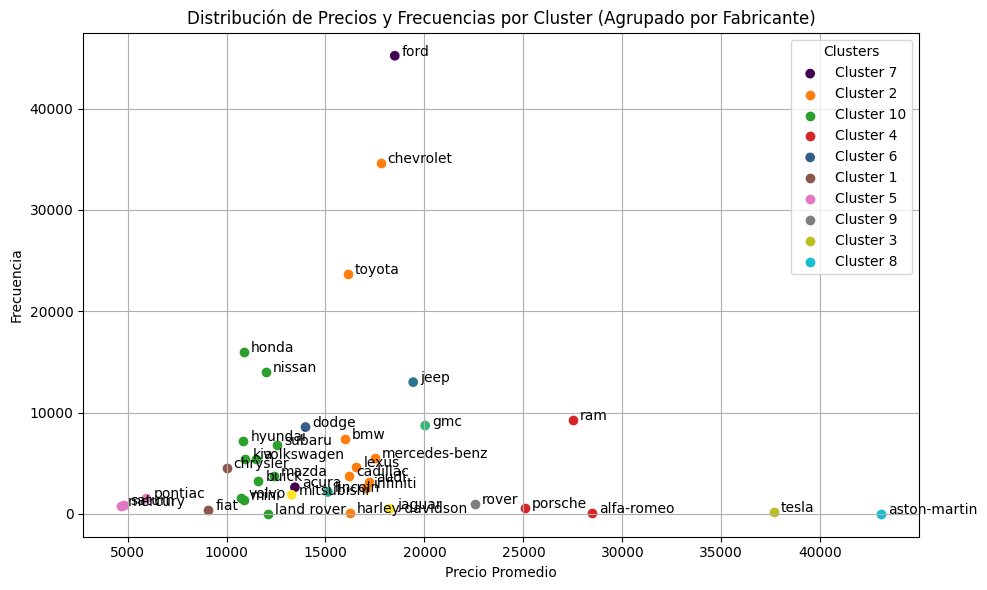

<bound method NDFrame.head of                     price_avg  frequency  cluster
manufacturer                                     
ford             18500.960695      45210        6
chevrolet        17784.172745      34629        1
toyota           16130.654393      23709        1
honda            10875.695003      15951        9
nissan           11986.507561      13953        9
jeep             19430.735923      13000        6
ram              27488.276019       9224        3
gmc              20037.287927       8714        6
dodge            13991.429372       8566        5
bmw              15981.840444       7383        1
hyundai          10854.207127       7184        9
subaru           12556.004093       6841        9
mercedes-benz    17476.992362       5499        1
volkswagen       11479.315340       5391        9
kia              10949.761692       5367        9
lexus            16557.447673       4577        1
chrysler         10012.923077       4498        0
cadillac         162

In [117]:
    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Agrega numpy para manejar colores de cluster
from sklearn.cluster import KMeans

# Carga tu dataframe aquí
df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')

# Agrupamos por 'manufacturer' y calculamos el precio promedio y la frecuencia
manufacturer_stats = df.groupby('manufacturer')[['price']].agg({'price': ['mean', 'count']})

# Renombramos las columnas
manufacturer_stats.columns = ['price_avg', 'frequency']

# Ordenamos por frecuencia descendente
manufacturer_stats = manufacturer_stats.sort_values(by='frequency', ascending=False)

# Definimos el número de clusters
n_clusters = 10  # Puedes ajustar este valor según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Ajustamos el modelo a los datos de precio promedio
kmeans.fit(manufacturer_stats[['price_avg']])

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

# Creamos una figura y un eje para la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos un scatter plot con el color asignado por cluster
unique_clusters = manufacturer_stats['cluster'].unique()
cluster_colors = plt.cm.tab10(np.arange(len(unique_clusters)) / len(unique_clusters))

for i, cluster in enumerate(unique_clusters):
    cluster_data = manufacturer_stats[manufacturer_stats['cluster'] == cluster]
    ax.scatter(cluster_data['price_avg'], cluster_data['frequency'], c=cluster_colors[i], label=f'Cluster {cluster+1}')
    
    # Añadimos etiquetas de fabricante
    for index, row in cluster_data.iterrows():
        ax.annotate(row.name, (row['price_avg'], row['frequency']), textcoords="offset points", xytext=(5,0), ha='left')

# Agregamos una leyenda en la parte inferior derecha
plt.legend(title='Clusters', loc='upper right')

# Ajustamos el título, etiquetas y mostramos la gráfica
plt.title('Distribución de Precios y Frecuencias por Cluster (Agrupado por Fabricante)')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

print(manufacturer_stats.head)
